In [2]:
import arrow
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import pandas as pd
import xarray as xr

%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
def check_nan(ds):
    for j, index in enumerate(ds.index):
        if ds.transport[j] != ds.transport[j]:
            print (index)

In [5]:
years = ['2015', '2016', '2017', '2018']

In [5]:
Vic_meanders = {}
for year in years:
    Vic_meanders[year]= pd.read_csv(f'Vic_meanders_{year}_v3.csv', index_col=0, parse_dates=True)
    print (year, Vic_meanders[year].transport.mean()/1000.); check_nan(Vic_meanders[year])

2015 459.6044733689572
2016 457.10397072074124
2017 455.8952666076104
2018 461.365798486758


Nan gives me a problem for missing date, 2018 Sep 04.

In [10]:
Vic_meanders['2015']

,transport,final_age,final_depth,final_salt,final_temp,final_lon,init_depth,init_salt,init_temp,init_lat
2015-01-01 00:00:00+00:00,504414.867837,1.639965,-42.929939,31.377585,9.390565,-123.379783,-48.338792,31.558168,9.565478,48.268806
2015-01-02 00:00:00+00:00,543384.835913,1.649696,-42.624967,31.447030,9.415395,-123.379811,-48.075608,31.633024,9.582963,48.267839
2015-01-03 00:00:00+00:00,562095.279616,1.560455,-43.307096,31.503271,9.423929,-123.379970,-47.728850,31.673659,9.564319,48.266785
2015-01-04 00:00:00+00:00,586835.348319,1.663976,-42.575302,31.534823,9.414641,-123.379249,-47.891787,31.715035,9.549356,48.264977
2015-01-05 00:00:00+00:00,573109.370169,1.650848,-44.026770,31.578049,9.427026,-123.377607,-47.704559,31.750938,9.539423,48.264277
...,...,...,...,...,...,...,...,...,...,...
2015-12-27 00:00:00+00:00,607436.142764,1.399672,-40.733178,31.374391,8.869071,-123.376677,-49.006325,31.452793,8.930043,48.263969
2015-12-28 00:00:00+00:00,538481.202674,1.490846,-42.274629,31.417110,8.858099,-123.376752,-48.265384,31.522028,8.929303,48.265180
2015-12-29 00:00:00+00:00,479331.976372,1.701633,-42.212213,31.408540,8.819128,-123.378250,-46.992796,31.527748,8.900485,48.267651
2015-12-30 00:00:00+00:00,417637.606887,1.738261,-42.755590,31.378384,8.765671,-123.378751,-45.859428,31.500162,8.852500,48.267583


<AxesSubplot:>

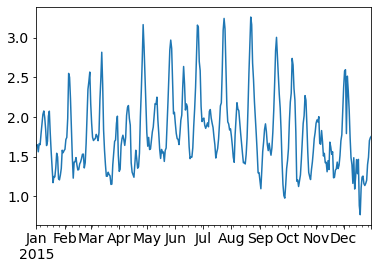

In [7]:
Vic_meanders['2015'].final_age.plot()

0.3410535667454433 379282.38062940974 -7654.957327347557
8.347219616564615 80322.09273954698 -91904.59845706722


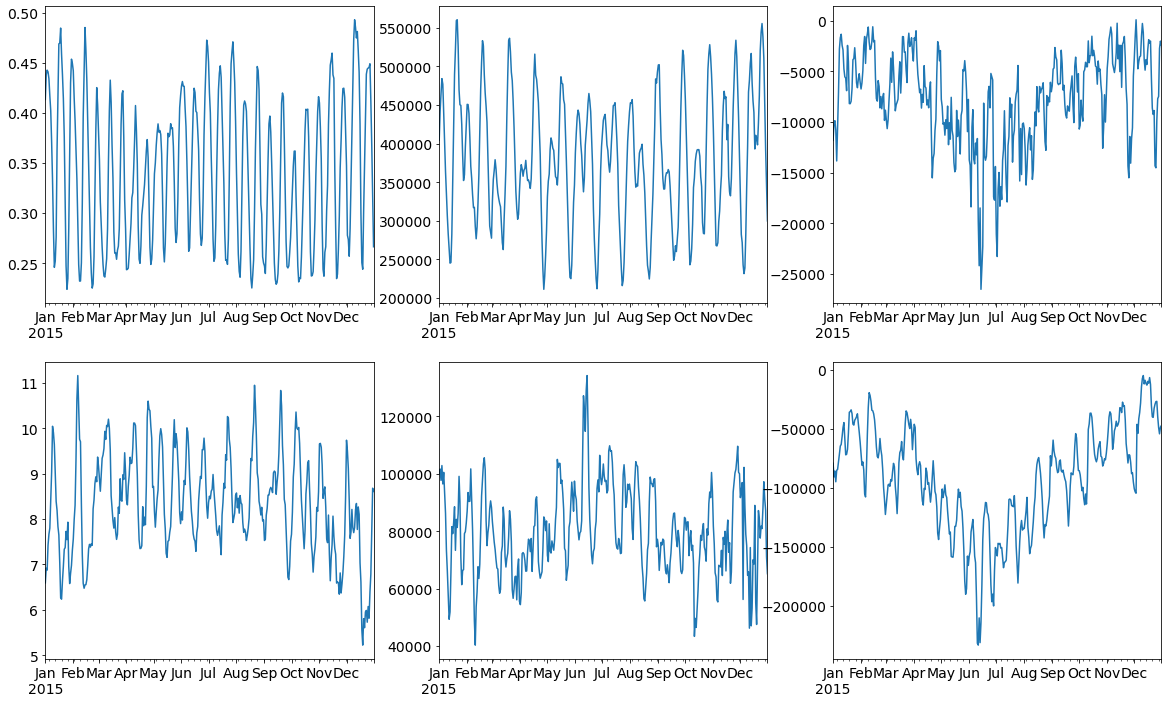

In [18]:
TidalPump = pd.read_csv(f'Vic_tidalpump_2015_v3.csv', index_col=0, parse_dates=True)
Loops = pd.read_csv(f'Vic_loops_2015_v3.csv', index_col=0, parse_dates=True)
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
TidalPump.final_age.plot(ax=axs[0, 0])
TidalPump.transport.plot(ax=axs[0, 1]);
(TidalPump.transport * (TidalPump.final_salt - TidalPump.init_salt)).plot(ax=axs[0, 2]);
Loops.final_age.plot(ax=axs[1, 0])
Loops.transport.plot(ax=axs[1, 1]);
(Loops.transport * (Loops.final_salt - Loops.init_salt)).plot(ax=axs[1, 2]);
print (TidalPump.final_age.mean(), TidalPump.transport.mean(), (TidalPump.transport * (TidalPump.final_salt - TidalPump.init_salt)).mean())
print (Loops.final_age.mean(), Loops.transport.mean(), (Loops.transport * (Loops.final_salt - Loops.init_salt)).mean())

In [6]:
Vic_meanders['2018'].loc['2018-09-04'] = 0.5 * (Vic_meanders['2018'].loc['2018-09-03'] + 
                                                Vic_meanders['2018'].loc['2018-09-05'])
Vic_meanders['2018'].loc['2018-09-04']

transport      434364.931316
final_age           2.280617
final_depth       -41.821934
final_salt         32.121251
final_temp          9.646202
final_lon        -123.380779
init_depth        -47.115291
init_salt          32.429400
init_temp           9.212545
init_lat           48.269617
Name: 2018-09-04 00:00:00+00:00, dtype: float64

In [7]:
Vic_meanders['2018'].to_csv('Vic_meanders_2018_v3.csv')

In [8]:
Vic_meanders = {}
for year in years:
    Vic_meanders[year]= pd.read_csv(f'Vic_meanders_{year}_v3.csv', index_col=0, parse_dates=True)
    print (year, Vic_meanders[year].transport.mean()/1000.); check_nan(Vic_meanders[year])

2015 459.6044733689572
2016 457.10397072074124
2017 455.8952666076104
2018 461.365798486758


In [9]:
Vic_back = {}
for year in years:
    Vic_back[year]= pd.read_csv(f'Vic_back_meanders_{year}_v3.csv', index_col=0, parse_dates=True)
    print (year, Vic_back[year].transport.mean()/1000.); check_nan(Vic_back[year])

2015 459.62737842183947
2016 455.7767307843876
2017 455.41233440933945
2018 461.85172465072424


458.3297096812945


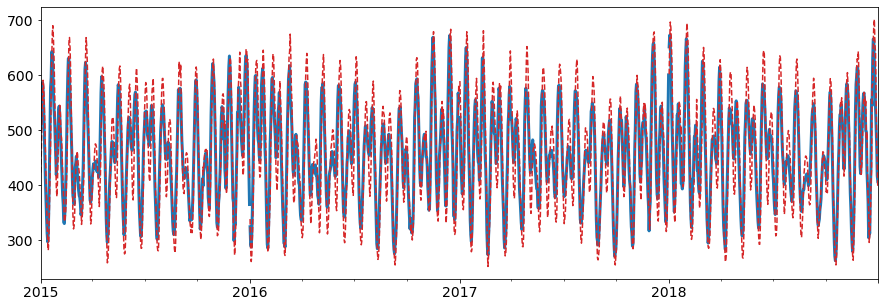

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sumit = 0.
for year in years:
    (Vic_meanders[year].transport/1000).plot(ax=ax, c='tab:blue', linewidth=3)
    (Vic_back[year].transport/1000).plot(ax=ax, c='tab:red', style='--')
    sumit = sumit + (Vic_meanders[year].transport/1000).mean() + (Vic_back[year].transport/1000).mean()
print (sumit/8.)

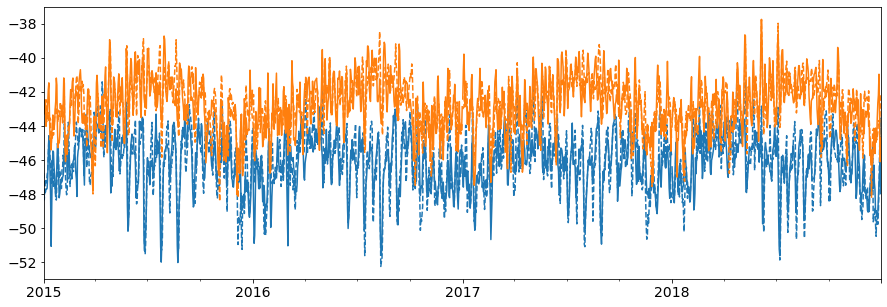

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    Vic_meanders[year].init_depth.plot(ax=ax, c='tab:blue')
    Vic_back[year].final_depth.plot(ax=ax, c='tab:blue', style='--')
    Vic_meanders[year].final_depth.plot(ax=ax, c='tab:orange')
    Vic_back[year].init_depth.plot(ax=ax, c='tab:orange', style='--')

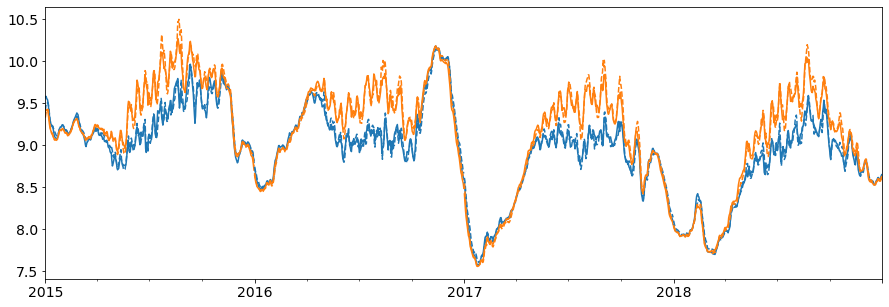

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    Vic_meanders[year].init_temp.plot(ax=ax, c='tab:blue')
    Vic_back[year].final_temp.plot(ax=ax, c='tab:blue', style='--')
    Vic_meanders[year].final_temp.plot(ax=ax, c='tab:orange')
    Vic_back[year].init_temp.plot(ax=ax, c='tab:orange', style='--')

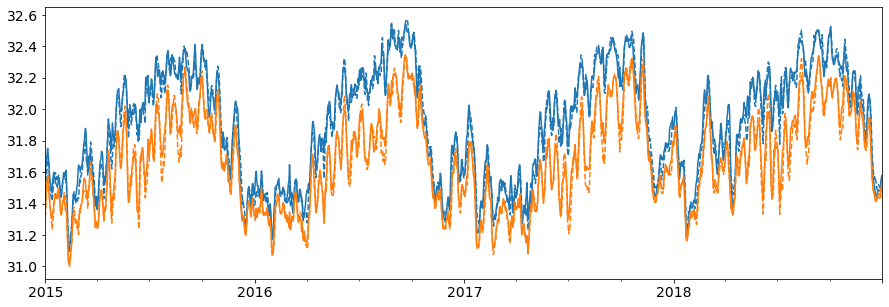

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    Vic_meanders[year].init_salt.plot(ax=ax, c='tab:blue')
    Vic_back[year].final_salt.plot(ax=ax, c='tab:blue', style='--')
    Vic_meanders[year].final_salt.plot(ax=ax, c='tab:orange')
    Vic_back[year].init_salt.plot(ax=ax, c='tab:orange', style='--')

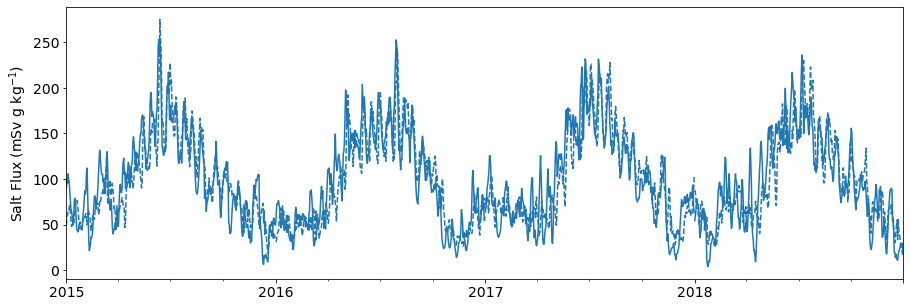

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    ((Vic_meanders[year].init_salt - Vic_meanders[year].final_salt) * 
     Vic_meanders[year].transport / 1000 ).plot(ax=ax, c='tab:blue')
    (-(Vic_back[year].init_salt - Vic_back[year].final_salt) * 
     Vic_back[year].transport / 1000 ).plot(ax=ax, c='tab:blue', style='--')
ax.set_ylabel('Salt Flux (mSv g kg$^{-1}$)');

In [15]:
print (((Vic_meanders[year].init_salt - Vic_meanders[year].final_salt) * 
     Vic_meanders[year].transport / 1000 ).mean())
print ((-(Vic_back[year].init_salt - Vic_back[year].final_salt) * 
     Vic_back[year].transport / 1000 ).mean())

96.2958397222368
96.8022402948587


In [16]:
def combine_GI_PR(A, B, C, D):
    E = A.copy()
    for key in A.keys():
        if key == 'transport':
            E.transport = A.transport + B.transport + C.transport + D.transport
        else:
            E[key] = ((A[key] * A.transport 
                        + B[key] * B.transport
                      + C[key] * C.transport
                      + D[key] * D.transport) /
                            (A.transport + B.transport + C.transport + D.transport))
    return E

In [39]:
def combine2(A, B):
    E = A.copy()
    for key in A.keys():
        if key == 'transport':
            E.transport = A.transport + B.transport
        else:
            E[key] = ((A[key] * A.transport 
                        + B[key] * B.transport) /
                            (A.transport + B.transport))
    return E

In [17]:
def read_file(filestub):
    output = {}
    for year in years:
        output[year]= pd.read_csv(f'{filestub}_{year}_v3.csv', index_col=0, parse_dates=True)
        print (year, output[year].transport.mean()/1000.); check_nan(output[year])
    return output

In [24]:
def pump_loops(year, section='PR', figs=True):
    TidalPump = pd.read_csv(f'{section}_tidalpump_{year}_v3.csv', index_col=0, parse_dates=True)
    Loops = pd.read_csv(f'{section}_loops_{year}_v3.csv', index_col=0, parse_dates=True)
    if figs:
        fig, axs = plt.subplots(2, 3, figsize=(20, 12))
        TidalPump.final_age.plot(ax=axs[0, 0])
        TidalPump.transport.plot(ax=axs[0, 1]);
        (TidalPump.transport * (TidalPump.final_salt - TidalPump.init_salt)).plot(ax=axs[0, 2]);
        Loops.final_age.plot(ax=axs[1, 0])
        Loops.transport.plot(ax=axs[1, 1]);
        (Loops.transport * (Loops.final_salt - Loops.init_salt)).plot(ax=axs[1, 2]);
        fig.suptitle(year)
    print (year)
    print (TidalPump.final_age.mean(), TidalPump.transport.mean(), (TidalPump.transport * (TidalPump.final_salt - TidalPump.init_salt)).mean())
    print (Loops.final_age.mean(), Loops.transport.mean(), (Loops.transport * (Loops.final_salt - Loops.init_salt)).mean())
    return (TidalPump.final_age.mean(), TidalPump.transport.mean(), (TidalPump.transport * (TidalPump.final_salt - TidalPump.init_salt)).mean(),
    Loops.final_age.mean(), Loops.transport.mean(), (Loops.transport * (Loops.final_salt - Loops.init_salt)).mean())

0.2915686534428546 201845.69837365372 2623.652981336827
8.221063313143718 47678.58631843371 37970.07453429865


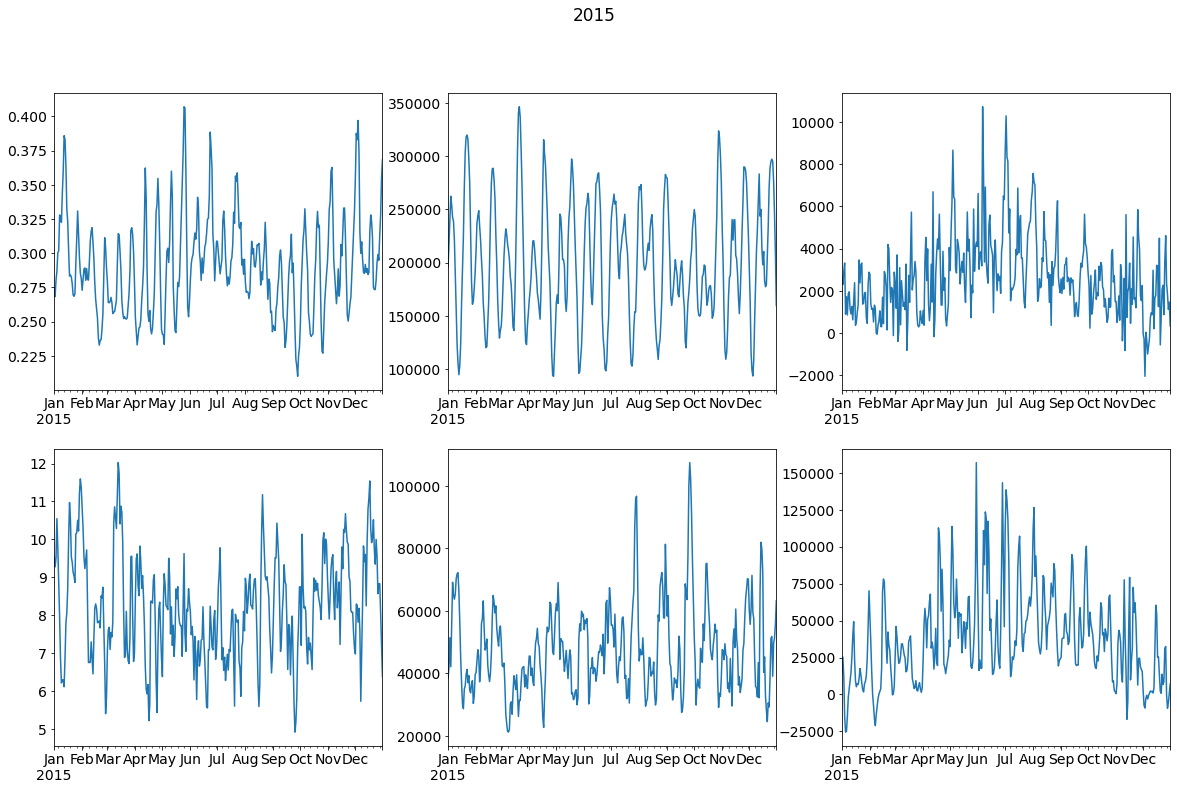

In [10]:
pump_loops(2015)

In [23]:
pr_data = np.zeros((4, 6))
pr_data[0] = pump_loops(2015, figs=False)
pr_data[1] = pump_loops(2016, figs=False)
pr_data[2] = pump_loops(2017, figs=False)
pr_data[3] = pump_loops(2018, figs=False)
pr_data.mean(axis=0)/1000.

2015
0.2915686534428546 201845.69837365372 2623.652981336827
8.221063313143718 47678.58631843371 37970.07453429865
2016
0.2918289119258407 199434.967405841 2790.9352718669443
8.339980316357794 48977.748423289486 39598.581639623764
2017
0.2920824676261135 200283.6882095889 2649.787778811425
8.187166719638435 47486.10159386719 40069.78687436007
2018
0.2951654791605423 203125.58598240328 2450.7400063192927
8.37573039393096 46198.22790548714 38763.88088139749


array([2.92661378e-04, 2.01172485e+02, 2.62877901e+00, 8.28098519e-03,
       4.75851661e+01, 3.91005810e+01])

In [26]:
prgi_data = np.zeros((4, 6))
prgi_data[0] = pump_loops(2015, section='PR_to_GI', figs=False)
prgi_data[1] = pump_loops(2016, section='PR_to_GI', figs=False)
prgi_data[2] = pump_loops(2017, section='PR_to_GI', figs=False)
prgi_data[3] = pump_loops(2018, section='PR_to_GI', figs=False)
prgi_data.mean(axis=0)/1000.

2015
0.3491871132982624 3654.754336458126 1711.1228484606359
9.638517558068715 2787.471034171718 2884.512297842018
2016
0.3586796548295702 3622.0409268278736 1495.252499670173
9.607988630277495 2751.349873273362 2588.3211969012973
2017
0.3558724259145367 3623.4388208977703 1693.8613188562356
9.521571770767547 2829.954222283181 2788.4216277100463
2018
0.3618413916493904 3694.0595568700073 1608.193764320608
9.466737357980344 2690.1864104802085 2661.523633159359


array([3.56395146e-04, 3.64857341e+00, 1.62710761e+00, 9.55870383e-03,
       2.76474039e+00, 2.73069469e+00])

In [27]:
gigi_data = np.zeros((4, 6))
gigi_data[0] = pump_loops(2015, section='GI', figs=False)
gigi_data[1] = pump_loops(2016, section='GI', figs=False)
gigi_data[2] = pump_loops(2017, section='GI', figs=False)
gigi_data[3] = pump_loops(2018, section='GI', figs=False)
gigi_data.mean(axis=0)/1000.

2015
0.2720511176030496 19436.33213601977 1723.1072677779025
4.990738185011853 3389.986809400522 688.2203362721697
2016
0.2731613606689914 19142.783995219317 1573.190440992242
5.008317875215877 3299.6859443199896 644.6749065850132
2017
0.2742700723069592 19291.195547882184 1756.039858400585
4.992208461382744 3290.5240777570475 708.3914056772961
2018
0.2772713509303925 19261.731703999663 1614.5729039120051
4.972490726334731 3300.5061953333693 658.7038244798891


array([2.74188475e-04, 1.92830108e+01, 1.66672762e+00, 4.99093881e-03,
       3.32017576e+00, 6.74997618e-01])

In [29]:
gipr_data = np.zeros((4, 6))
gipr_data[0] = pump_loops(2015, section='GI_to_PR', figs=False)
gipr_data[1] = pump_loops(2016, section='GI_to_PR', figs=False)
gipr_data[2] = pump_loops(2017, section='GI_to_PR', figs=False)
gipr_data[3] = pump_loops(2018, section='GI_to_PR', figs=False)
gipr_data.mean(axis=0)/1000.

2015
0.504422221850338 487.29417748197386 -30.089442598781424
13.230514858005513 2255.874740147105 2875.5614273446363
2016
0.5178099919392977 454.4167972199971 -4.100815640610943
13.31080490339014 2350.462514601201 3008.171318529821
2017
0.5156741607052964 459.2094004162983 -10.562206861321918
13.414686782347083 2320.8673886093693 3175.979257371997
2018
0.49997425888079844 492.4955624453084 20.714956164264546
13.3647649614405 2405.270014436853 2888.4342984569653


array([ 5.09470158e-04,  4.73353984e-01, -6.00937723e-03,  1.33301929e-02,
        2.33311866e+00,  2.98703658e+00])

In [32]:
(pr_data.mean(axis=0)/1000. + prgi_data.mean(axis=0)/1000. 
+ gigi_data.mean(axis=0)/1000. + gipr_data.mean(axis=0)/1000.)

array([1.43271516e-03, 2.24577423e+02, 5.91660486e+00, 3.61608207e-02,
       5.60032009e+01, 4.54933099e+01])

In [18]:
PRm = read_file('PR_meanders')

2015 249.52428469208726
2016 248.41271582913075
2017 247.81725025915125
2018 249.3238138878904


In [19]:
def interpolate(ds, miss, before, after):
    ds.loc[miss] = 0.5 * (ds.loc[before] + ds.loc[after])
    return ds

In [20]:
PRm['2017'] = interpolate(PRm['2017'], '2017-08-12', '2017-08-11', '2017-08-13')
PRm['2017'].to_csv('PR_meanders_2017_v3.csv')

In [21]:
PRm = read_file('PR_meanders')

2015 249.52428469208726
2016 248.41271582913075
2017 247.81725025915125
2018 249.3238138878904


In [22]:
GIm = read_file('GI_meanders')

2015 22.82631894542032
2016 22.442469939539297
2017 22.581719625639245
2017-08-20 00:00:00+00:00
2018 22.562237899333038


In [23]:
PRtoGI = read_file('PR_to_GI_meanders')

2015 6.442225370629849
2016 6.37339080010123
2017 6.455730343836987
2018 6.384245967350218


In [24]:
PRtoGI['2017'] = interpolate(PRtoGI['2017'], '2017-08-12', '2017-08-11', '2017-08-13')
PRtoGI['2017'].to_csv('PR_to_GI_meanders_2017_v3.csv')

In [25]:
PRtoGI = read_file('PR_to_GI_meanders')

2015 6.442225370629849
2016 6.37339080010123
2017 6.455730343836987
2018 6.384245967350218


In [26]:
GItoPR = read_file('PR_to_GI_meanders')

2015 6.442225370629849
2016 6.37339080010123
2017 6.455730343836987
2018 6.384245967350218


In [27]:
SoG_meanders = {}
for year in years:
    SoG_meanders[year]= combine_GI_PR(PRm[year], GIm[year], PRtoGI[year], GItoPR[year])


In [28]:
PRb = read_file('PR_back_meanders')

2015 250.12799488427748
2016 249.01786243742686
2017 248.16419507868773
2018 249.18094343330768


In [29]:
GIb = read_file('GI_back_meanders')

2015 22.881961944551815
2016 22.50717414657727
2017 22.67109375000791
2018 22.627061756625007


In [30]:
PRfromGI = read_file('PR_from_GI_meanders')

2015 2.7212888285617804
2016 2.7711178463785577
2017 2.7718471351328753
2018 2.8723846252772027


In [31]:
GIfromPR = read_file('GI_from_PI_meanders')

2015 6.393349536668235
2016 6.320227488106439
2017 6.392129687824123
2018 6.337183596248577


In [43]:
SoG_back = {}
for year in years:
    SoG_back[year]= combine_GI_PR(PRb[year], GIb[year], PRfromGI[year], GIfromPR[year])

282.5513762812829


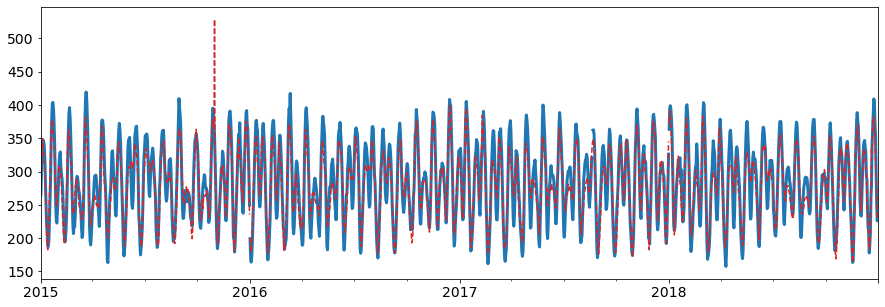

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sumit = 0.
for year in years:
    (SoG_meanders[year].transport/1000).plot(ax=ax, c='tab:blue', linewidth=3)
    (SoG_back[year].transport/1000).plot(ax=ax, c='tab:red', style='--')
    sumit = sumit + (SoG_meanders[year].transport/1000).mean() + (SoG_back[year].transport/1000).mean()
print (sumit/8.)

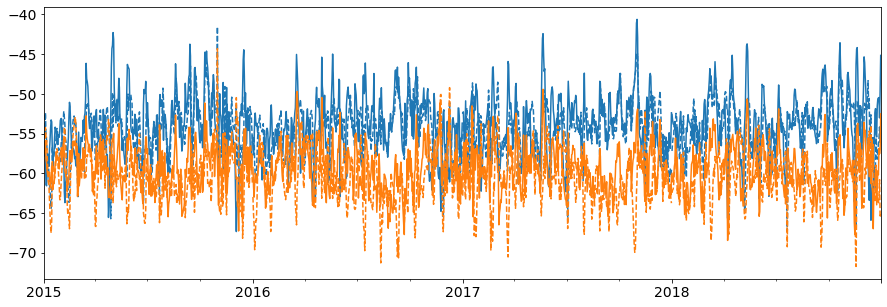

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    SoG_meanders[year].init_depth.plot(ax=ax, c='tab:blue')
    SoG_back[year].final_depth.plot(ax=ax, c='tab:blue', style='--')
    SoG_meanders[year].final_depth.plot(ax=ax, c='tab:orange')
    SoG_back[year].init_depth.plot(ax=ax, c='tab:orange', style='--')

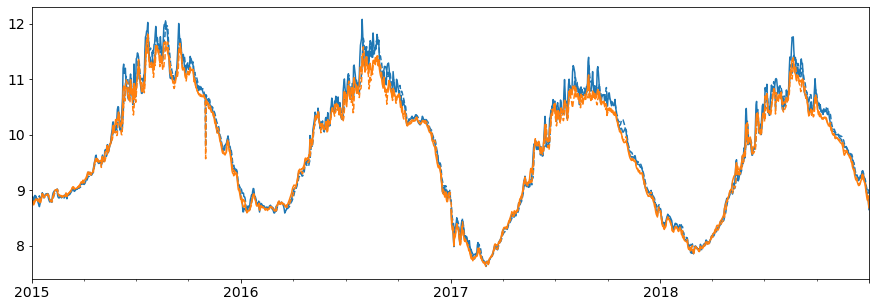

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    SoG_meanders[year].init_temp.plot(ax=ax, c='tab:blue')
    SoG_back[year].final_temp.plot(ax=ax, c='tab:blue', style='--')
    SoG_meanders[year].final_temp.plot(ax=ax, c='tab:orange')
    SoG_back[year].init_temp.plot(ax=ax, c='tab:orange', style='--')

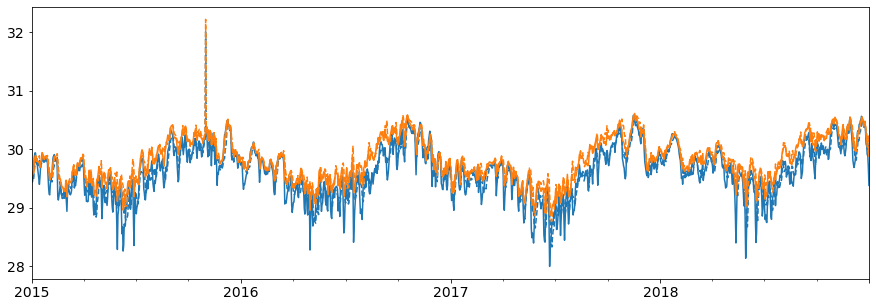

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    SoG_meanders[year].init_salt.plot(ax=ax, c='tab:blue')
    SoG_back[year].final_salt.plot(ax=ax, c='tab:blue', style='--')
    SoG_meanders[year].final_salt.plot(ax=ax, c='tab:orange')
    SoG_back[year].init_salt.plot(ax=ax, c='tab:orange', style='--')

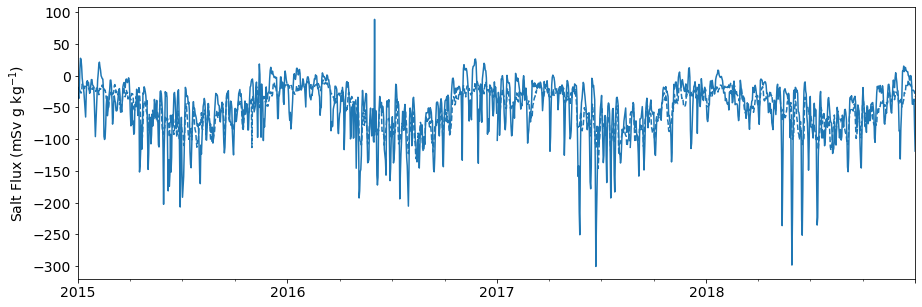

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for year in years:
    ((SoG_meanders[year].init_salt - SoG_meanders[year].final_salt) * 
     SoG_meanders[year].transport / 1000 ).plot(ax=ax, c='tab:blue')
    (-(SoG_back[year].init_salt - SoG_back[year].final_salt) * 
     SoG_back[year].transport / 1000 ).plot(ax=ax, c='tab:blue', style='--')
ax.set_ylabel('Salt Flux (mSv g kg$^{-1}$)');

In [35]:
print (((SoG_meanders[year].init_salt - SoG_meanders[year].final_salt) * 
     SoG_meanders[year].transport / 1000 ).mean())
print ( ((SoG_back[year].init_salt - SoG_back[year].final_salt) * 
     SoG_back[year].transport / 1000 ).mean())

-52.02733241106843
51.01646601046659


### Let's Compare to the Salt Flux into the "Box" from the through flow ###

In [42]:
PRtV = read_file('PR_to_Vic')
GItV = read_file('GI_to_Vic')
SoG_south = {}
for year in years:
    SoG_south[year]= combine2(PRtV[year], GItV[year])

2015 23.92338736346641
2016 24.19189036414444
2017 23.97470431375392
2018 23.178320740374932
2015 8.115411705285155
2016 7.943580282776077
2017 8.29146055139337
2018 7.869992439194588


In [44]:
PRfV = read_file('PR_from_Vic')
GIfV = read_file('GI_from_Vic')
SoG_north = {}
for year in years:
    SoG_north[year]= combine2(PRfV[year], GIfV[year])

2015 23.16950381813652
2016 23.663626086798114
2017 24.14207376302192
2018 23.62750203239279
2015 2.3915417662123426
2016 2.142756450834758
2017 2.295670801586399
2018 2.2291513992804424


In [45]:
VtPR = read_file('Vic_to_PR')
VtGI = read_file('Vic_to_GI')
Vic_north = {}
for year in years:
    Vic_north[year]= combine2(VtPR[year], VtGI[year])

2015 23.2609609498734
2016 23.97500188093224
2017 24.207005729799395
2018 23.22579033595232
2015 2.357789516901223
2016 2.1163811267552926
2017 2.253939800455463
2018 2.1046988741053907


In [46]:
VfPR = read_file('Vic_from_PR')
VfGI = read_file('Vic_from_GI')
Vic_south = {}
for year in years:
    Vic_south[year]= combine2(VfPR[year], VfGI[year])

2015 24.050306657100922
2016 24.0459997703401
2017 23.99031293778868
2018 23.092685865657998
2015 7.975172729078496
2016 7.842403511699931
2017 8.19476770248127
2018 7.685422003213119


In [47]:
print (((Vic_south[year].init_salt - Vic_south[year].final_salt) * 
     Vic_south[year].transport / 1000 ).mean())
print ( ((SoG_south[year].init_salt - SoG_south[year].final_salt) * 
     SoG_south[year].transport / 1000 ).mean())

89.48487803089189
-89.63537199863963


In [48]:
print (((Vic_north[year].init_salt - Vic_north[year].final_salt) * 
     Vic_north[year].transport / 1000 ).mean())
print ( ((SoG_north[year].init_salt - SoG_north[year].final_salt) * 
     SoG_north[year].transport / 1000 ).mean())

51.87996528228754
-53.1668313726388


In [50]:
NM = 0
NT = 0
SM = 0
ST = 0
for year in years:
    NM = NM + 0.25 * 0.5 * (
        (((SoG_meanders[year].init_salt - SoG_meanders[year].final_salt) * 
     SoG_meanders[year].transport / 1000 ).mean())  +
         (-(SoG_back[year].init_salt - SoG_back[year].final_salt) * 
     SoG_back[year].transport / 1000 ).mean() )
    NT = NT + 0.25 * 0.5 * (
        (-((Vic_north[year].init_salt - Vic_north[year].final_salt) * 
     Vic_north[year].transport / 1000 ).mean()) + 
         ((SoG_north[year].init_salt - SoG_north[year].final_salt) * 
     SoG_north[year].transport / 1000 ).mean())
    SM = SM + 0.25 * 0.5 * (
        (((Vic_meanders[year].init_salt - Vic_meanders[year].final_salt) * 
     Vic_meanders[year].transport / 1000 ).mean()) +
         (-(Vic_back[year].init_salt - Vic_back[year].final_salt) * 
     Vic_back[year].transport / 1000 ).mean())
    ST = ST + 0.25 * 0.5 * (
        (((Vic_south[year].init_salt - Vic_south[year].final_salt) * 
     Vic_south[year].transport / 1000 ).mean()) + 
        (-(SoG_south[year].init_salt - SoG_south[year].final_salt) * 
     SoG_south[year].transport / 1000 ).mean())
print (NM, NT, SM, ST, NM+NT+SM+ST)

-52.099281466482225 -53.46844143589075 98.45512669225843 90.60886411454098 83.49626790442643


In [52]:
# Transport Sum
Strans = 0
Ntrans = 0
for year in years:
    Ntrans = Ntrans + 0.25 * 0.5 * (
        (
     Vic_north[year].transport / 1000 ).mean() + 
         (
     SoG_north[year].transport / 1000 ).mean())
    Strans = Strans + 0.25 * 0.5 * (
        (
     Vic_south[year].transport / 1000 ).mean() + 
        (
     SoG_south[year].transport / 1000 ).mean())
print (Strans, Ntrans, Strans-Ntrans)  

31.795727367218667 25.895424291629762 5.900303075588905


### Puget Sound Salt Fluxes


In [54]:
PSfVS = read_file('Puget_from_VS')

2015 32.11063057486481
2016 31.791265866765475
2017 32.63411362822932
2018 31.974974475267008


In [55]:
PStVS = read_file('Puget_to_VS')

2015 36.45268117198009
2016 36.18675222950619
2017 37.34107459497765
2018 35.78550002975459


In [57]:
EP = 0
WP = 0
for year in years:
    EP = EP + 0.25 * (
        (((PSfVS[year].init_salt - PSfVS[year].final_salt) * 
     PSfVS[year].transport / 1000 ).mean())
    )
    WP = WP + 0.25 * (
        (-((PStVS[year].init_salt - PStVS[year].final_salt) * 
     PStVS[year].transport / 1000 ).mean())
    )
print (EP, WP, EP+WP)

23.79393503254958 -8.405139576913008 15.388795455636572


In [ ]:
EPtrans = 0
WPtrans = 0
for year in years:
    EPtrans = EPtrans + 0.25 * (
     PSfVS[year].transport / 1000 ).mean()
    WP = WP + 0.25 * (
        (-((PStVS[year].init_salt - PStVS[year].final_salt) * 
     PStVS[year].transport / 1000 ).mean())
    )
print (EP, WP, EP+WP)

In [59]:
PSfPR = read_file('Puget_from_PR')
PSfGI = read_file('Puget_from_GI')
PSfSoG= {}
for year in years:
    PSfSoG[year]= combine2(PSfPR[year], PSfGI[year])

2015 3.5413015004888324
2016 3.674636940318098
2017 3.5205199908609988
2018 3.3409394178175713
2015 0.22480574956460092
2016 0.2281861880408229
2017 0.24991048723058096
2018 0.23730029875844272


In [60]:
PStPR = read_file('Puget_to_PR')
PStGI = read_file('Puget_to_GI')
PStSoG= {}
for year in years:
    PStSoG[year]= combine2(PStPR[year], PStGI[year])

2015 1.7165588600465715
2016 1.7792393264627913
2017 1.758615596343058
2018 1.6860387080267338
2015 0.20151703565341111
2016 0.21412623761363206
2017 0.18837581553138733
2018 0.17510074786222532


In [63]:
NP = 0
SP = 0
for year in years:
    SP = SP + 0.25 * (
        (((PSfSoG[year].init_salt - PSfSoG[year].final_salt) * 
     PSfSoG[year].transport / 1000 ).mean())
    )
    NP = NP + 0.25 * (
        (-((PStSoG[year].init_salt - PStSoG[year].final_salt) * 
     PStSoG[year].transport / 1000 ).mean())
    )
print (SP, NP, SP+NP)

-10.36294780151188 0.9667957266002927 -9.396152074911587


In [64]:
98.5+90.6+25

214.1

In [65]:
214 - 123

91